In [10]:
import pandas as pd
import numpy as np
import pickle
import time
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from xgboost import plot_importance
import xgboost as xgb
import matplotlib.pyplot as plt
import sys
import gc
import seaborn as sns

In [11]:
def save_pkl(file_dir, data):
    f = open(file_dir,"wb")
    pickle.dump(data, f, protocol=4)
    f.close()
    
def read_pkl(file_dir):
    f = open(file_dir,"rb")
    data = pickle.load(f)
    return data

def mape_error(y_true, y_pred):
    return -np.sqrt(np.sum((y_pred - y_true) * (y_pred - y_true)) * 1.0 / y_true.shape[0])

def scoring(reg, x, y):
    pred = reg.predict(x)
    return smape(pred, y)

def smape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (y_true + y_pred) * 2)

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

def model_performance_sc_plot(predictions, labels, title):
    # Get min and max values of the predictions and labels.
    min_val = max(max(predictions), max(labels))
    max_val = min(min(predictions), min(labels))
    # Create dataframe with predicitons and labels.
    performance_df = pd.DataFrame({"Label":labels})
    performance_df["Prediction"] = predictions
    # Plot data
    sns.jointplot(y="Label", x="Prediction", data=performance_df, kind="reg")
    plt.plot([min_val, max_val], [min_val, max_val],'m--')
    plt.title(title, fontsize=9)
    plt.show()

In [22]:
# load the whole size dataset
X = np.load("London/X_all.npy")
Y_NO2 = np.load("London/Y_NO2_all.npy")
Y_PM10 = np.load("London/Y_PM10_all.npy")
Y_PM25 = np.load("London/Y_PM25_all.npy")

# PM25

In [13]:
# split the Y_PM25, X into training part and testing part
train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25 = train_test_split(X, Y_PM25, test_size=0.2, random_state=11)
print(train_X_PM25.shape, test_X_PM25.shape, train_Y_PM25.shape, test_Y_PM25.shape)

(730828, 198) (182708, 198) (730828,) (182708,)


In [15]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    gamma=0.8,
    min_child_weight=2,
    reg_alpha=0.001,
    max_delta_step=0,
    colsample_bylevel=0.9,
    colsample_bytree=0.8, 
    subsample=0.8,
    base_score=10,
    eta=0.3,    
    seed=1,
    nthread=30)

model.fit(
    train_X_PM25, 
    train_Y_PM25, 
    eval_metric="rmse", 
    eval_set=[(train_X_PM25, train_Y_PM25), (test_X_PM25, test_Y_PM25)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_PM25)
print (smape(pred, test_Y_PM25))
time.time() - ts

[0]	validation_0-rmse:19.245	validation_1-rmse:19.2633
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:17.4032	validation_1-rmse:17.4209
[2]	validation_0-rmse:15.7672	validation_1-rmse:15.7842
[3]	validation_0-rmse:14.284	validation_1-rmse:14.3001
[4]	validation_0-rmse:12.9527	validation_1-rmse:12.9687
[5]	validation_0-rmse:11.7598	validation_1-rmse:11.777
[6]	validation_0-rmse:10.6928	validation_1-rmse:10.711
[7]	validation_0-rmse:9.7387	validation_1-rmse:9.75832
[8]	validation_0-rmse:8.88464	validation_1-rmse:8.90634
[9]	validation_0-rmse:8.12465	validation_1-rmse:8.14854
[10]	validation_0-rmse:7.44978	validation_1-rmse:7.47609
[11]	validation_0-rmse:6.84478	validation_1-rmse:6.87377
[12]	validation_0-rmse:6.30879	validation_1-rmse:6.34172
[13]	validation_0-rmse:5.83141	validation_1-rmse:5.86682
[14]	validation_0-rmse:5.41013	validation_1-rmse:5.44899
[

[142]	validation_0-rmse:1.44347	validation_1-rmse:1.63477
[143]	validation_0-rmse:1.43815	validation_1-rmse:1.6301
[144]	validation_0-rmse:1.43192	validation_1-rmse:1.62471
[145]	validation_0-rmse:1.42715	validation_1-rmse:1.62051
[146]	validation_0-rmse:1.42142	validation_1-rmse:1.61543
[147]	validation_0-rmse:1.41405	validation_1-rmse:1.60886
[148]	validation_0-rmse:1.41199	validation_1-rmse:1.60701
[149]	validation_0-rmse:1.40901	validation_1-rmse:1.60446
[150]	validation_0-rmse:1.40494	validation_1-rmse:1.60096
[151]	validation_0-rmse:1.40004	validation_1-rmse:1.59684
[152]	validation_0-rmse:1.3938	validation_1-rmse:1.59154
[153]	validation_0-rmse:1.38878	validation_1-rmse:1.58703
[154]	validation_0-rmse:1.38139	validation_1-rmse:1.58034
[155]	validation_0-rmse:1.37445	validation_1-rmse:1.57427
[156]	validation_0-rmse:1.3672	validation_1-rmse:1.56773
[157]	validation_0-rmse:1.36348	validation_1-rmse:1.56457
[158]	validation_0-rmse:1.3567	validation_1-rmse:1.5584
[159]	validation_0-

[284]	validation_0-rmse:0.968321	validation_1-rmse:1.2307
[285]	validation_0-rmse:0.967912	validation_1-rmse:1.23041
[286]	validation_0-rmse:0.966008	validation_1-rmse:1.22885
[287]	validation_0-rmse:0.962924	validation_1-rmse:1.22635
[288]	validation_0-rmse:0.960959	validation_1-rmse:1.22489
[289]	validation_0-rmse:0.959228	validation_1-rmse:1.22346
[290]	validation_0-rmse:0.957084	validation_1-rmse:1.2217
[291]	validation_0-rmse:0.954677	validation_1-rmse:1.2198
[292]	validation_0-rmse:0.952387	validation_1-rmse:1.21801
[293]	validation_0-rmse:0.950645	validation_1-rmse:1.21657
[294]	validation_0-rmse:0.948326	validation_1-rmse:1.21473
[295]	validation_0-rmse:0.946841	validation_1-rmse:1.21361
[296]	validation_0-rmse:0.944063	validation_1-rmse:1.21139
[297]	validation_0-rmse:0.942712	validation_1-rmse:1.2103
[298]	validation_0-rmse:0.942099	validation_1-rmse:1.20989
[299]	validation_0-rmse:0.941242	validation_1-rmse:1.20934
[300]	validation_0-rmse:0.940048	validation_1-rmse:1.20841
[

[424]	validation_0-rmse:0.774153	validation_1-rmse:1.08202
[425]	validation_0-rmse:0.773473	validation_1-rmse:1.08155
[426]	validation_0-rmse:0.771972	validation_1-rmse:1.08039
[427]	validation_0-rmse:0.771052	validation_1-rmse:1.07976
[428]	validation_0-rmse:0.769322	validation_1-rmse:1.07857
[429]	validation_0-rmse:0.766942	validation_1-rmse:1.07672
[430]	validation_0-rmse:0.765952	validation_1-rmse:1.07603
[431]	validation_0-rmse:0.763569	validation_1-rmse:1.07422
[432]	validation_0-rmse:0.762142	validation_1-rmse:1.0732
[433]	validation_0-rmse:0.761149	validation_1-rmse:1.07255
[434]	validation_0-rmse:0.760052	validation_1-rmse:1.07172
[435]	validation_0-rmse:0.759873	validation_1-rmse:1.07161
[436]	validation_0-rmse:0.758804	validation_1-rmse:1.07093
[437]	validation_0-rmse:0.757154	validation_1-rmse:1.06973
[438]	validation_0-rmse:0.755943	validation_1-rmse:1.06885
[439]	validation_0-rmse:0.754239	validation_1-rmse:1.06757
[440]	validation_0-rmse:0.752853	validation_1-rmse:1.0666

[564]	validation_0-rmse:0.650505	validation_1-rmse:0.998245
[565]	validation_0-rmse:0.650024	validation_1-rmse:0.997979
[566]	validation_0-rmse:0.649792	validation_1-rmse:0.99785
[567]	validation_0-rmse:0.649623	validation_1-rmse:0.99776
[568]	validation_0-rmse:0.648694	validation_1-rmse:0.997193
[569]	validation_0-rmse:0.647626	validation_1-rmse:0.996511
[570]	validation_0-rmse:0.647237	validation_1-rmse:0.996381
[571]	validation_0-rmse:0.646684	validation_1-rmse:0.996023
[572]	validation_0-rmse:0.646398	validation_1-rmse:0.995845
[573]	validation_0-rmse:0.645838	validation_1-rmse:0.995488
[574]	validation_0-rmse:0.645358	validation_1-rmse:0.995174
[575]	validation_0-rmse:0.644623	validation_1-rmse:0.994684
[576]	validation_0-rmse:0.644465	validation_1-rmse:0.994619
[577]	validation_0-rmse:0.643693	validation_1-rmse:0.994118
[578]	validation_0-rmse:0.643345	validation_1-rmse:0.993945
[579]	validation_0-rmse:0.642492	validation_1-rmse:0.99339
[580]	validation_0-rmse:0.642044	validation

[701]	validation_0-rmse:0.573024	validation_1-rmse:0.951702
[702]	validation_0-rmse:0.572571	validation_1-rmse:0.951342
[703]	validation_0-rmse:0.572147	validation_1-rmse:0.951115
[704]	validation_0-rmse:0.571425	validation_1-rmse:0.950604
[705]	validation_0-rmse:0.571037	validation_1-rmse:0.950451
[706]	validation_0-rmse:0.570547	validation_1-rmse:0.950206
[707]	validation_0-rmse:0.569951	validation_1-rmse:0.94989
[708]	validation_0-rmse:0.569657	validation_1-rmse:0.949763
[709]	validation_0-rmse:0.569469	validation_1-rmse:0.949674
[710]	validation_0-rmse:0.569301	validation_1-rmse:0.949599
[711]	validation_0-rmse:0.569161	validation_1-rmse:0.949514
[712]	validation_0-rmse:0.568525	validation_1-rmse:0.94908
[713]	validation_0-rmse:0.568051	validation_1-rmse:0.948819
[714]	validation_0-rmse:0.567681	validation_1-rmse:0.948598
[715]	validation_0-rmse:0.567482	validation_1-rmse:0.948512
[716]	validation_0-rmse:0.566951	validation_1-rmse:0.948212
[717]	validation_0-rmse:0.566432	validatio

[839]	validation_0-rmse:0.520958	validation_1-rmse:0.923212
[840]	validation_0-rmse:0.520516	validation_1-rmse:0.922961
[841]	validation_0-rmse:0.519838	validation_1-rmse:0.922574
[842]	validation_0-rmse:0.519537	validation_1-rmse:0.922461
[843]	validation_0-rmse:0.519323	validation_1-rmse:0.922336
[844]	validation_0-rmse:0.518999	validation_1-rmse:0.922182
[845]	validation_0-rmse:0.518366	validation_1-rmse:0.921847
[846]	validation_0-rmse:0.51792	validation_1-rmse:0.921625
[847]	validation_0-rmse:0.517467	validation_1-rmse:0.921374
[848]	validation_0-rmse:0.51722	validation_1-rmse:0.921248
[849]	validation_0-rmse:0.517043	validation_1-rmse:0.921175
[850]	validation_0-rmse:0.516277	validation_1-rmse:0.920727
[851]	validation_0-rmse:0.515782	validation_1-rmse:0.920506
[852]	validation_0-rmse:0.515177	validation_1-rmse:0.920212
[853]	validation_0-rmse:0.515016	validation_1-rmse:0.920145
[854]	validation_0-rmse:0.51441	validation_1-rmse:0.919757
[855]	validation_0-rmse:0.513951	validation

[977]	validation_0-rmse:0.478078	validation_1-rmse:0.901498
[978]	validation_0-rmse:0.477857	validation_1-rmse:0.901383
[979]	validation_0-rmse:0.477681	validation_1-rmse:0.901313
[980]	validation_0-rmse:0.477405	validation_1-rmse:0.901149
[981]	validation_0-rmse:0.477231	validation_1-rmse:0.901083
[982]	validation_0-rmse:0.47702	validation_1-rmse:0.900965
[983]	validation_0-rmse:0.476602	validation_1-rmse:0.900751
[984]	validation_0-rmse:0.476297	validation_1-rmse:0.900632
[985]	validation_0-rmse:0.475797	validation_1-rmse:0.900422
[986]	validation_0-rmse:0.475612	validation_1-rmse:0.900338
[987]	validation_0-rmse:0.475383	validation_1-rmse:0.90021
[988]	validation_0-rmse:0.475043	validation_1-rmse:0.90003
[989]	validation_0-rmse:0.474744	validation_1-rmse:0.899889
[990]	validation_0-rmse:0.474439	validation_1-rmse:0.899721
[991]	validation_0-rmse:0.474091	validation_1-rmse:0.899566
[992]	validation_0-rmse:0.473841	validation_1-rmse:0.899422
[993]	validation_0-rmse:0.473762	validation

[1113]	validation_0-rmse:0.443462	validation_1-rmse:0.885201
[1114]	validation_0-rmse:0.44298	validation_1-rmse:0.885002
[1115]	validation_0-rmse:0.442928	validation_1-rmse:0.885002
[1116]	validation_0-rmse:0.442736	validation_1-rmse:0.884938
[1117]	validation_0-rmse:0.442546	validation_1-rmse:0.884841
[1118]	validation_0-rmse:0.442397	validation_1-rmse:0.884818
[1119]	validation_0-rmse:0.442294	validation_1-rmse:0.884777
[1120]	validation_0-rmse:0.44201	validation_1-rmse:0.884669
[1121]	validation_0-rmse:0.441806	validation_1-rmse:0.884558
[1122]	validation_0-rmse:0.441547	validation_1-rmse:0.884416
[1123]	validation_0-rmse:0.44117	validation_1-rmse:0.884173
[1124]	validation_0-rmse:0.440659	validation_1-rmse:0.883908
[1125]	validation_0-rmse:0.440374	validation_1-rmse:0.883796
[1126]	validation_0-rmse:0.440193	validation_1-rmse:0.883744
[1127]	validation_0-rmse:0.439952	validation_1-rmse:0.883642
[1128]	validation_0-rmse:0.439613	validation_1-rmse:0.883514
[1129]	validation_0-rmse:0.

[1248]	validation_0-rmse:0.413336	validation_1-rmse:0.872093
[1249]	validation_0-rmse:0.412991	validation_1-rmse:0.871965
[1250]	validation_0-rmse:0.412827	validation_1-rmse:0.871905
[1251]	validation_0-rmse:0.41272	validation_1-rmse:0.871858
[1252]	validation_0-rmse:0.412645	validation_1-rmse:0.871832
[1253]	validation_0-rmse:0.41244	validation_1-rmse:0.871769
[1254]	validation_0-rmse:0.412164	validation_1-rmse:0.871696
[1255]	validation_0-rmse:0.411959	validation_1-rmse:0.871608
[1256]	validation_0-rmse:0.411807	validation_1-rmse:0.871543
[1257]	validation_0-rmse:0.411649	validation_1-rmse:0.871472
[1258]	validation_0-rmse:0.411476	validation_1-rmse:0.871395
[1259]	validation_0-rmse:0.411347	validation_1-rmse:0.871351
[1260]	validation_0-rmse:0.410958	validation_1-rmse:0.87117
[1261]	validation_0-rmse:0.410768	validation_1-rmse:0.871091
[1262]	validation_0-rmse:0.410599	validation_1-rmse:0.871003
[1263]	validation_0-rmse:0.410376	validation_1-rmse:0.870897
[1264]	validation_0-rmse:0.

[1383]	validation_0-rmse:0.387735	validation_1-rmse:0.862183
[1384]	validation_0-rmse:0.387567	validation_1-rmse:0.862104
[1385]	validation_0-rmse:0.387451	validation_1-rmse:0.862057
[1386]	validation_0-rmse:0.387319	validation_1-rmse:0.862001
[1387]	validation_0-rmse:0.387161	validation_1-rmse:0.861933
[1388]	validation_0-rmse:0.386984	validation_1-rmse:0.861871
[1389]	validation_0-rmse:0.386823	validation_1-rmse:0.861832
[1390]	validation_0-rmse:0.386741	validation_1-rmse:0.861805
[1391]	validation_0-rmse:0.386575	validation_1-rmse:0.861728
[1392]	validation_0-rmse:0.386525	validation_1-rmse:0.861694
[1393]	validation_0-rmse:0.386401	validation_1-rmse:0.861636
[1394]	validation_0-rmse:0.38634	validation_1-rmse:0.86162
[1395]	validation_0-rmse:0.386212	validation_1-rmse:0.861574
[1396]	validation_0-rmse:0.385985	validation_1-rmse:0.861546
[1397]	validation_0-rmse:0.385803	validation_1-rmse:0.861493
[1398]	validation_0-rmse:0.38566	validation_1-rmse:0.861428
[1399]	validation_0-rmse:0.

[1519]	validation_0-rmse:0.366851	validation_1-rmse:0.854593
[1520]	validation_0-rmse:0.366641	validation_1-rmse:0.854544
[1521]	validation_0-rmse:0.366438	validation_1-rmse:0.854432
[1522]	validation_0-rmse:0.366334	validation_1-rmse:0.854406
[1523]	validation_0-rmse:0.366116	validation_1-rmse:0.854315
[1524]	validation_0-rmse:0.365929	validation_1-rmse:0.854247
[1525]	validation_0-rmse:0.365842	validation_1-rmse:0.854214
[1526]	validation_0-rmse:0.365601	validation_1-rmse:0.854103
[1527]	validation_0-rmse:0.365399	validation_1-rmse:0.854022
[1528]	validation_0-rmse:0.365218	validation_1-rmse:0.853946
[1529]	validation_0-rmse:0.364952	validation_1-rmse:0.853857
[1530]	validation_0-rmse:0.364724	validation_1-rmse:0.853736
[1531]	validation_0-rmse:0.364575	validation_1-rmse:0.853688
[1532]	validation_0-rmse:0.364415	validation_1-rmse:0.853606
[1533]	validation_0-rmse:0.364292	validation_1-rmse:0.85356
[1534]	validation_0-rmse:0.364091	validation_1-rmse:0.853517
[1535]	validation_0-rmse:

[1654]	validation_0-rmse:0.347258	validation_1-rmse:0.847937
[1655]	validation_0-rmse:0.347102	validation_1-rmse:0.847881
[1656]	validation_0-rmse:0.347062	validation_1-rmse:0.84787
[1657]	validation_0-rmse:0.346945	validation_1-rmse:0.847819
[1658]	validation_0-rmse:0.346794	validation_1-rmse:0.847783
[1659]	validation_0-rmse:0.346605	validation_1-rmse:0.847732
[1660]	validation_0-rmse:0.346488	validation_1-rmse:0.847693
[1661]	validation_0-rmse:0.346435	validation_1-rmse:0.847687
[1662]	validation_0-rmse:0.346175	validation_1-rmse:0.847573
[1663]	validation_0-rmse:0.34608	validation_1-rmse:0.847538
[1664]	validation_0-rmse:0.345879	validation_1-rmse:0.847444
[1665]	validation_0-rmse:0.345806	validation_1-rmse:0.847436
[1666]	validation_0-rmse:0.345609	validation_1-rmse:0.84738
[1667]	validation_0-rmse:0.345502	validation_1-rmse:0.847344
[1668]	validation_0-rmse:0.345364	validation_1-rmse:0.847291
[1669]	validation_0-rmse:0.345145	validation_1-rmse:0.847204
[1670]	validation_0-rmse:0.

[1789]	validation_0-rmse:0.329582	validation_1-rmse:0.842096
[1790]	validation_0-rmse:0.32935	validation_1-rmse:0.842017
[1791]	validation_0-rmse:0.329105	validation_1-rmse:0.84193
[1792]	validation_0-rmse:0.329039	validation_1-rmse:0.841916
[1793]	validation_0-rmse:0.328948	validation_1-rmse:0.84189
[1794]	validation_0-rmse:0.328754	validation_1-rmse:0.841814
[1795]	validation_0-rmse:0.328561	validation_1-rmse:0.841727
[1796]	validation_0-rmse:0.328432	validation_1-rmse:0.841695
[1797]	validation_0-rmse:0.328171	validation_1-rmse:0.841585
[1798]	validation_0-rmse:0.328004	validation_1-rmse:0.841521
[1799]	validation_0-rmse:0.327781	validation_1-rmse:0.841437
[1800]	validation_0-rmse:0.327716	validation_1-rmse:0.841436
[1801]	validation_0-rmse:0.32753	validation_1-rmse:0.841374
[1802]	validation_0-rmse:0.327508	validation_1-rmse:0.84137
[1803]	validation_0-rmse:0.3273	validation_1-rmse:0.841326
[1804]	validation_0-rmse:0.32718	validation_1-rmse:0.841272
[1805]	validation_0-rmse:0.32711

[1924]	validation_0-rmse:0.312783	validation_1-rmse:0.836971
[1925]	validation_0-rmse:0.312705	validation_1-rmse:0.836944
[1926]	validation_0-rmse:0.312563	validation_1-rmse:0.836895
[1927]	validation_0-rmse:0.31249	validation_1-rmse:0.836866
[1928]	validation_0-rmse:0.312378	validation_1-rmse:0.836831
[1929]	validation_0-rmse:0.312265	validation_1-rmse:0.836823
[1930]	validation_0-rmse:0.312146	validation_1-rmse:0.836776
[1931]	validation_0-rmse:0.312019	validation_1-rmse:0.83673
[1932]	validation_0-rmse:0.311901	validation_1-rmse:0.83668
[1933]	validation_0-rmse:0.311798	validation_1-rmse:0.836636
[1934]	validation_0-rmse:0.311729	validation_1-rmse:0.836607
[1935]	validation_0-rmse:0.311637	validation_1-rmse:0.836588
[1936]	validation_0-rmse:0.311546	validation_1-rmse:0.836566
[1937]	validation_0-rmse:0.31145	validation_1-rmse:0.836545
[1938]	validation_0-rmse:0.311354	validation_1-rmse:0.836519
[1939]	validation_0-rmse:0.311231	validation_1-rmse:0.836479
[1940]	validation_0-rmse:0.3

59921.91719174385

In [17]:
save_pkl("London/xgboost_PM25.model", model)

In [21]:
test_X = np.load("London/X_test.npy")
test_Y = np.load("London/Y_PM25_test.npy")
pred = model.predict(test_X)
print (smape(pred, test_Y))

0.4764965886500002


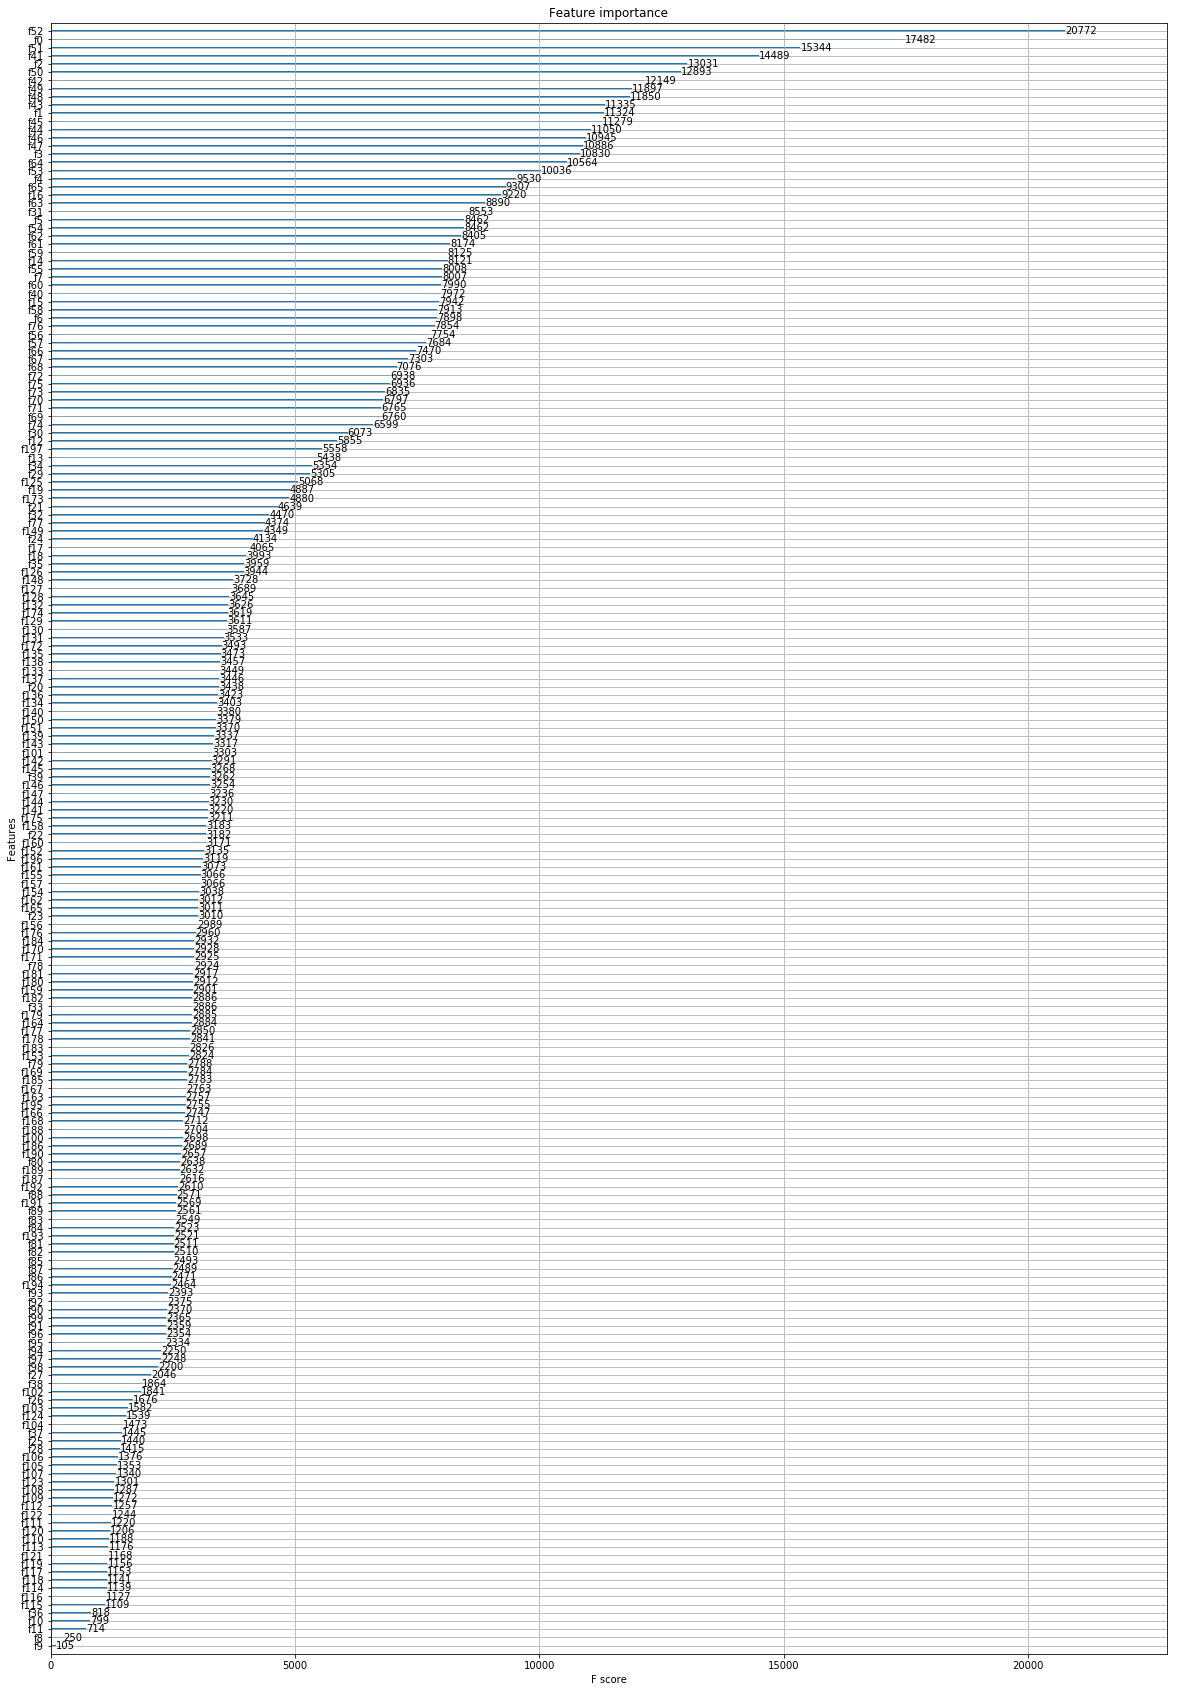

In [20]:
plot_features(model, (20,30))

# NO2

In [24]:
# split the Y_NO2, X into training part and testing part
train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2 = train_test_split(X, Y_NO2, test_size=0.2, random_state=11)
print(train_X_NO2.shape, test_X_NO2.shape, train_Y_NO2.shape, test_Y_NO2.shape)

(202675, 125) (50669, 125) (202675,) (50669,)


In [25]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    learning_rate=0.001,
    n_estimators=1000,
    gamma=0.8,
    min_child_weight=2,
    reg_alpha=0.001,
    max_delta_step=0,
    colsample_bylevel=0.9,
    colsample_bytree=0.8, 
    subsample=0.8,
    base_score=10,
    eta=0.3,    
    seed=1,
    nthread=30)

model.fit(
    train_X_NO2, 
    train_Y_NO2, 
    eval_metric="rmse", 
    eval_set=[(train_X_NO2, train_Y_NO2), (test_X_NO2, test_Y_NO2)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_NO2)
print (smape(pred, test_Y_NO2))
time.time() - ts

[0]	validation_0-rmse:42.7225	validation_1-rmse:42.3198
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:42.6888	validation_1-rmse:42.2865
[2]	validation_0-rmse:42.6553	validation_1-rmse:42.2532
[3]	validation_0-rmse:42.6212	validation_1-rmse:42.22
[4]	validation_0-rmse:42.5881	validation_1-rmse:42.1866
[5]	validation_0-rmse:42.5543	validation_1-rmse:42.1533
[6]	validation_0-rmse:42.5206	validation_1-rmse:42.1202
[7]	validation_0-rmse:42.4873	validation_1-rmse:42.0868
[8]	validation_0-rmse:42.454	validation_1-rmse:42.0537
[9]	validation_0-rmse:42.4203	validation_1-rmse:42.0208
[10]	validation_0-rmse:42.3872	validation_1-rmse:41.9877
[11]	validation_0-rmse:42.3535	validation_1-rmse:41.9545
[12]	validation_0-rmse:42.3204	validation_1-rmse:41.9215
[13]	validation_0-rmse:42.2872	validation_1-rmse:41.8886
[14]	validation_0-rmse:42.2541	validation_1-rmse:41.8555

[141]	validation_0-rmse:38.3391	validation_1-rmse:37.9814
[142]	validation_0-rmse:38.3105	validation_1-rmse:37.9531
[143]	validation_0-rmse:38.2821	validation_1-rmse:37.925
[144]	validation_0-rmse:38.2538	validation_1-rmse:37.8968
[145]	validation_0-rmse:38.2255	validation_1-rmse:37.8692
[146]	validation_0-rmse:38.1973	validation_1-rmse:37.841
[147]	validation_0-rmse:38.1689	validation_1-rmse:37.8129
[148]	validation_0-rmse:38.1407	validation_1-rmse:37.7851
[149]	validation_0-rmse:38.1124	validation_1-rmse:37.7571
[150]	validation_0-rmse:38.0843	validation_1-rmse:37.7292
[151]	validation_0-rmse:38.056	validation_1-rmse:37.7012
[152]	validation_0-rmse:38.0278	validation_1-rmse:37.6734
[153]	validation_0-rmse:37.9998	validation_1-rmse:37.6454
[154]	validation_0-rmse:37.9717	validation_1-rmse:37.6178
[155]	validation_0-rmse:37.9434	validation_1-rmse:37.5899
[156]	validation_0-rmse:37.915	validation_1-rmse:37.5621
[157]	validation_0-rmse:37.887	validation_1-rmse:37.5346
[158]	validation_0-

[283]	validation_0-rmse:34.6237	validation_1-rmse:34.3129
[284]	validation_0-rmse:34.5996	validation_1-rmse:34.2893
[285]	validation_0-rmse:34.5759	validation_1-rmse:34.2657
[286]	validation_0-rmse:34.5519	validation_1-rmse:34.2421
[287]	validation_0-rmse:34.5281	validation_1-rmse:34.2188
[288]	validation_0-rmse:34.5044	validation_1-rmse:34.1952
[289]	validation_0-rmse:34.4806	validation_1-rmse:34.1717
[290]	validation_0-rmse:34.4568	validation_1-rmse:34.1484
[291]	validation_0-rmse:34.4332	validation_1-rmse:34.125
[292]	validation_0-rmse:34.4095	validation_1-rmse:34.1016
[293]	validation_0-rmse:34.3858	validation_1-rmse:34.0784
[294]	validation_0-rmse:34.3621	validation_1-rmse:34.0552
[295]	validation_0-rmse:34.3385	validation_1-rmse:34.0319
[296]	validation_0-rmse:34.3152	validation_1-rmse:34.0086
[297]	validation_0-rmse:34.2916	validation_1-rmse:33.9856
[298]	validation_0-rmse:34.2682	validation_1-rmse:33.9624
[299]	validation_0-rmse:34.2447	validation_1-rmse:33.9393
[300]	validatio

[425]	validation_0-rmse:31.5183	validation_1-rmse:31.2568
[426]	validation_0-rmse:31.4984	validation_1-rmse:31.2371
[427]	validation_0-rmse:31.4786	validation_1-rmse:31.2176
[428]	validation_0-rmse:31.4588	validation_1-rmse:31.1981
[429]	validation_0-rmse:31.4389	validation_1-rmse:31.1787
[430]	validation_0-rmse:31.4191	validation_1-rmse:31.1593
[431]	validation_0-rmse:31.3995	validation_1-rmse:31.1399
[432]	validation_0-rmse:31.3797	validation_1-rmse:31.1205
[433]	validation_0-rmse:31.3601	validation_1-rmse:31.1012
[434]	validation_0-rmse:31.3404	validation_1-rmse:31.0819
[435]	validation_0-rmse:31.3206	validation_1-rmse:31.0626
[436]	validation_0-rmse:31.3011	validation_1-rmse:31.0433
[437]	validation_0-rmse:31.2816	validation_1-rmse:31.0241
[438]	validation_0-rmse:31.2618	validation_1-rmse:31.005
[439]	validation_0-rmse:31.2423	validation_1-rmse:30.9857
[440]	validation_0-rmse:31.2227	validation_1-rmse:30.9663
[441]	validation_0-rmse:31.2031	validation_1-rmse:30.9472
[442]	validatio

[567]	validation_0-rmse:28.9425	validation_1-rmse:28.7324
[568]	validation_0-rmse:28.9262	validation_1-rmse:28.7164
[569]	validation_0-rmse:28.9098	validation_1-rmse:28.7003
[570]	validation_0-rmse:28.8933	validation_1-rmse:28.6842
[571]	validation_0-rmse:28.877	validation_1-rmse:28.6682
[572]	validation_0-rmse:28.8608	validation_1-rmse:28.6522
[573]	validation_0-rmse:28.8443	validation_1-rmse:28.6361
[574]	validation_0-rmse:28.828	validation_1-rmse:28.6203
[575]	validation_0-rmse:28.8115	validation_1-rmse:28.6043
[576]	validation_0-rmse:28.7954	validation_1-rmse:28.5885
[577]	validation_0-rmse:28.7791	validation_1-rmse:28.5726
[578]	validation_0-rmse:28.763	validation_1-rmse:28.5567
[579]	validation_0-rmse:28.7467	validation_1-rmse:28.5408
[580]	validation_0-rmse:28.7305	validation_1-rmse:28.5249
[581]	validation_0-rmse:28.7142	validation_1-rmse:28.5091
[582]	validation_0-rmse:28.6982	validation_1-rmse:28.4934
[583]	validation_0-rmse:28.682	validation_1-rmse:28.4775
[584]	validation_0

[709]	validation_0-rmse:26.8209	validation_1-rmse:26.6633
[710]	validation_0-rmse:26.8074	validation_1-rmse:26.6501
[711]	validation_0-rmse:26.794	validation_1-rmse:26.637
[712]	validation_0-rmse:26.7805	validation_1-rmse:26.6239
[713]	validation_0-rmse:26.7671	validation_1-rmse:26.6109
[714]	validation_0-rmse:26.7537	validation_1-rmse:26.598
[715]	validation_0-rmse:26.7402	validation_1-rmse:26.585
[716]	validation_0-rmse:26.7268	validation_1-rmse:26.5718
[717]	validation_0-rmse:26.7134	validation_1-rmse:26.5589
[718]	validation_0-rmse:26.7001	validation_1-rmse:26.5459
[719]	validation_0-rmse:26.6868	validation_1-rmse:26.533
[720]	validation_0-rmse:26.6734	validation_1-rmse:26.5201
[721]	validation_0-rmse:26.6602	validation_1-rmse:26.5072
[722]	validation_0-rmse:26.647	validation_1-rmse:26.4943
[723]	validation_0-rmse:26.6339	validation_1-rmse:26.4815
[724]	validation_0-rmse:26.6205	validation_1-rmse:26.4686
[725]	validation_0-rmse:26.6073	validation_1-rmse:26.4556
[726]	validation_0-r

[851]	validation_0-rmse:25.084	validation_1-rmse:24.9801
[852]	validation_0-rmse:25.073	validation_1-rmse:24.9695
[853]	validation_0-rmse:25.062	validation_1-rmse:24.9589
[854]	validation_0-rmse:25.0512	validation_1-rmse:24.9483
[855]	validation_0-rmse:25.0401	validation_1-rmse:24.9376
[856]	validation_0-rmse:25.0293	validation_1-rmse:24.9271
[857]	validation_0-rmse:25.0184	validation_1-rmse:24.9166
[858]	validation_0-rmse:25.0074	validation_1-rmse:24.9059
[859]	validation_0-rmse:24.9965	validation_1-rmse:24.8955
[860]	validation_0-rmse:24.9856	validation_1-rmse:24.885
[861]	validation_0-rmse:24.9746	validation_1-rmse:24.8745
[862]	validation_0-rmse:24.9637	validation_1-rmse:24.864
[863]	validation_0-rmse:24.9528	validation_1-rmse:24.8534
[864]	validation_0-rmse:24.942	validation_1-rmse:24.8431
[865]	validation_0-rmse:24.9312	validation_1-rmse:24.8326
[866]	validation_0-rmse:24.9204	validation_1-rmse:24.8222
[867]	validation_0-rmse:24.9097	validation_1-rmse:24.8119
[868]	validation_0-r

[993]	validation_0-rmse:23.6729	validation_1-rmse:23.6222
[994]	validation_0-rmse:23.6641	validation_1-rmse:23.6136
[995]	validation_0-rmse:23.6551	validation_1-rmse:23.6051
[996]	validation_0-rmse:23.6462	validation_1-rmse:23.5966
[997]	validation_0-rmse:23.6373	validation_1-rmse:23.5881
[998]	validation_0-rmse:23.6283	validation_1-rmse:23.5796
[999]	validation_0-rmse:23.6195	validation_1-rmse:23.5711
0.43245928480353135


3123.5863778591156

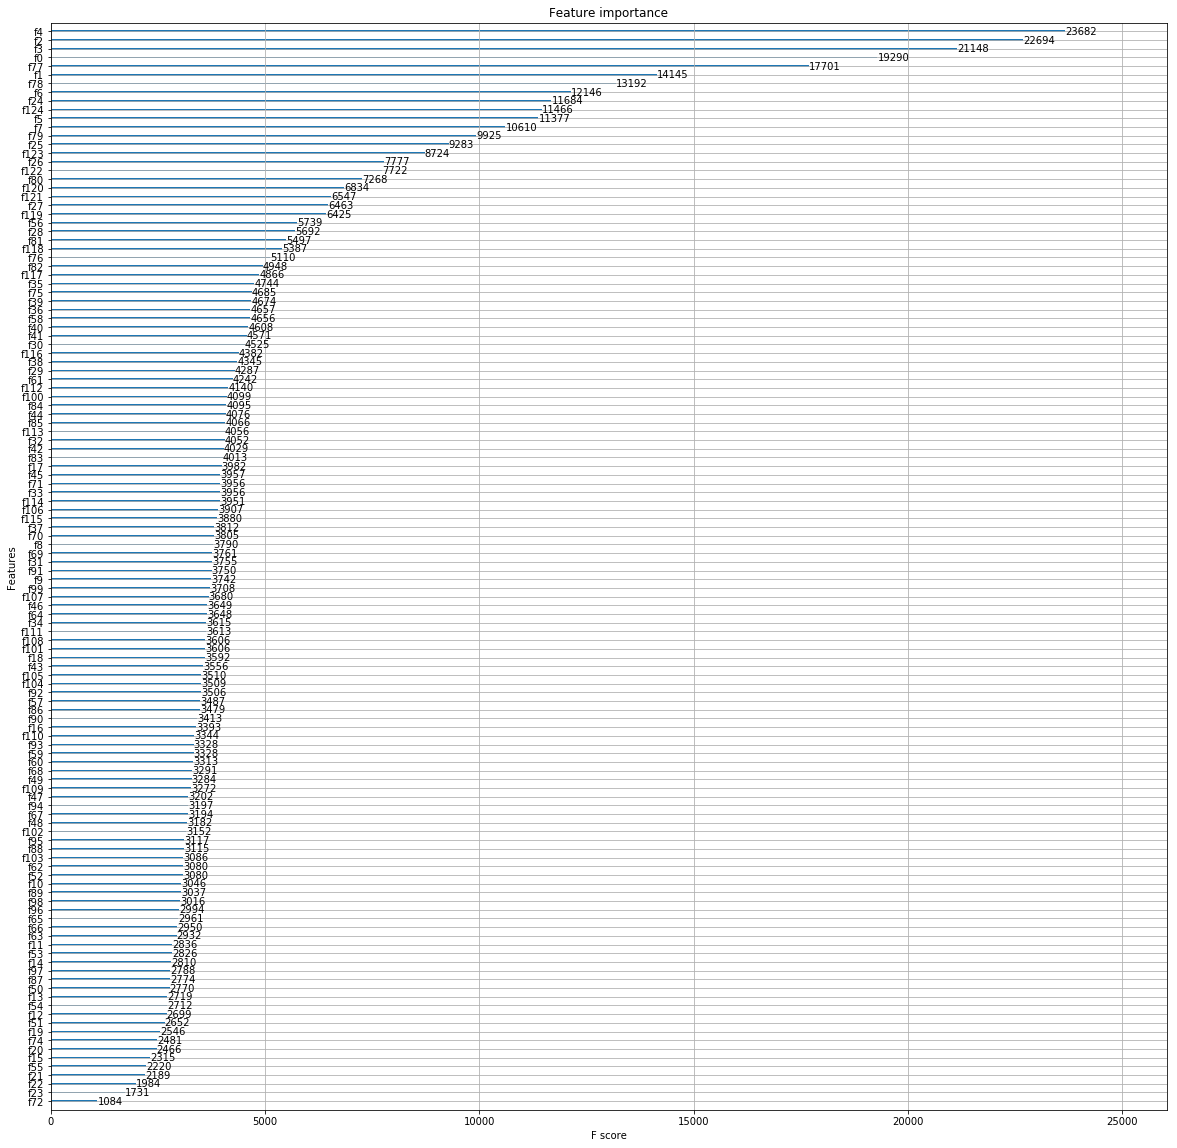

In [26]:
plot_features(model, (20,20))

# PM10

In [16]:
# split the Y_PM10, X into training part and testing part
train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10 = train_test_split(X, Y_PM10, test_size=0.2, random_state=11)
print(train_X_PM10.shape, test_X_PM10.shape, train_Y_PM10.shape, test_Y_PM10.shape)

(202675, 125) (50669, 125) (202675,) (50669,)


In [27]:
#XGBoost
def smape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (y_true + y_pred) * 2)

ts = time.time()

model = XGBRegressor(
    max_depth=10,
    learning_rate=0.001,
    n_estimators=1000,
    gamma=0.8,
    min_child_weight=2,
    reg_alpha=0.001,
    max_delta_step=0,
    colsample_bylevel=0.9,
    colsample_bytree=0.8, 
    subsample=0.8,
    base_score=10,
    eta=0.3,    
    seed=1,
    nthread=30)

model.fit(
    train_X_PM10, 
    train_Y_PM10, 
    #eval_metric="smape", 
    eval_set=[(train_X_PM10, train_Y_PM10), (test_X_PM10, test_Y_PM10)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_PM10)
print (smape(pred, test_Y_PM10))
time.time() - ts

[0]	validation_0-rmse:16.087	validation_1-rmse:16.057
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:16.0759	validation_1-rmse:16.0455
[2]	validation_0-rmse:16.0646	validation_1-rmse:16.0342
[3]	validation_0-rmse:16.053	validation_1-rmse:16.0229
[4]	validation_0-rmse:16.0413	validation_1-rmse:16.0116
[5]	validation_0-rmse:16.0297	validation_1-rmse:16.0004
[6]	validation_0-rmse:16.0186	validation_1-rmse:15.9892
[7]	validation_0-rmse:16.0072	validation_1-rmse:15.9779
[8]	validation_0-rmse:15.9961	validation_1-rmse:15.9668
[9]	validation_0-rmse:15.9849	validation_1-rmse:15.9556
[10]	validation_0-rmse:15.9736	validation_1-rmse:15.9444
[11]	validation_0-rmse:15.9623	validation_1-rmse:15.9332
[12]	validation_0-rmse:15.9509	validation_1-rmse:15.9221
[13]	validation_0-rmse:15.9397	validation_1-rmse:15.9109
[14]	validation_0-rmse:15.9286	validation_1-rmse:15.8999

[141]	validation_0-rmse:14.6113	validation_1-rmse:14.5997
[142]	validation_0-rmse:14.6018	validation_1-rmse:14.5903
[143]	validation_0-rmse:14.5923	validation_1-rmse:14.5809
[144]	validation_0-rmse:14.5828	validation_1-rmse:14.5715
[145]	validation_0-rmse:14.5733	validation_1-rmse:14.5622
[146]	validation_0-rmse:14.5637	validation_1-rmse:14.5528
[147]	validation_0-rmse:14.5542	validation_1-rmse:14.5434
[148]	validation_0-rmse:14.5447	validation_1-rmse:14.5341
[149]	validation_0-rmse:14.5353	validation_1-rmse:14.5247
[150]	validation_0-rmse:14.5258	validation_1-rmse:14.5155
[151]	validation_0-rmse:14.5163	validation_1-rmse:14.5062
[152]	validation_0-rmse:14.5069	validation_1-rmse:14.4969
[153]	validation_0-rmse:14.4975	validation_1-rmse:14.4877
[154]	validation_0-rmse:14.4882	validation_1-rmse:14.4784
[155]	validation_0-rmse:14.4788	validation_1-rmse:14.4691
[156]	validation_0-rmse:14.4694	validation_1-rmse:14.4598
[157]	validation_0-rmse:14.4599	validation_1-rmse:14.4506
[158]	validati

[283]	validation_0-rmse:13.374	validation_1-rmse:13.3822
[284]	validation_0-rmse:13.3661	validation_1-rmse:13.3745
[285]	validation_0-rmse:13.3581	validation_1-rmse:13.3667
[286]	validation_0-rmse:13.3503	validation_1-rmse:13.3589
[287]	validation_0-rmse:13.3425	validation_1-rmse:13.3512
[288]	validation_0-rmse:13.3346	validation_1-rmse:13.3435
[289]	validation_0-rmse:13.3267	validation_1-rmse:13.3358
[290]	validation_0-rmse:13.319	validation_1-rmse:13.3282
[291]	validation_0-rmse:13.3112	validation_1-rmse:13.3204
[292]	validation_0-rmse:13.3034	validation_1-rmse:13.3127
[293]	validation_0-rmse:13.2955	validation_1-rmse:13.3051
[294]	validation_0-rmse:13.2878	validation_1-rmse:13.2974
[295]	validation_0-rmse:13.28	validation_1-rmse:13.2897
[296]	validation_0-rmse:13.2721	validation_1-rmse:13.282
[297]	validation_0-rmse:13.2644	validation_1-rmse:13.2745
[298]	validation_0-rmse:13.2567	validation_1-rmse:13.2669
[299]	validation_0-rmse:13.249	validation_1-rmse:13.2592
[300]	validation_0-r

[425]	validation_0-rmse:12.3527	validation_1-rmse:12.3808
[426]	validation_0-rmse:12.3461	validation_1-rmse:12.3744
[427]	validation_0-rmse:12.3397	validation_1-rmse:12.3681
[428]	validation_0-rmse:12.3332	validation_1-rmse:12.3617
[429]	validation_0-rmse:12.3267	validation_1-rmse:12.3554
[430]	validation_0-rmse:12.3202	validation_1-rmse:12.3491
[431]	validation_0-rmse:12.3137	validation_1-rmse:12.3428
[432]	validation_0-rmse:12.3073	validation_1-rmse:12.3365
[433]	validation_0-rmse:12.3009	validation_1-rmse:12.3302
[434]	validation_0-rmse:12.2944	validation_1-rmse:12.3239
[435]	validation_0-rmse:12.288	validation_1-rmse:12.3176
[436]	validation_0-rmse:12.2816	validation_1-rmse:12.3113
[437]	validation_0-rmse:12.2752	validation_1-rmse:12.3051
[438]	validation_0-rmse:12.2688	validation_1-rmse:12.2988
[439]	validation_0-rmse:12.2624	validation_1-rmse:12.2926
[440]	validation_0-rmse:12.256	validation_1-rmse:12.2863
[441]	validation_0-rmse:12.2496	validation_1-rmse:12.2801
[442]	validation

[567]	validation_0-rmse:11.5148	validation_1-rmse:11.5639
[568]	validation_0-rmse:11.5095	validation_1-rmse:11.5587
[569]	validation_0-rmse:11.5042	validation_1-rmse:11.5536
[570]	validation_0-rmse:11.4989	validation_1-rmse:11.5484
[571]	validation_0-rmse:11.4936	validation_1-rmse:11.5432
[572]	validation_0-rmse:11.4883	validation_1-rmse:11.5381
[573]	validation_0-rmse:11.483	validation_1-rmse:11.5329
[574]	validation_0-rmse:11.4777	validation_1-rmse:11.5278
[575]	validation_0-rmse:11.4724	validation_1-rmse:11.5227
[576]	validation_0-rmse:11.4672	validation_1-rmse:11.5176
[577]	validation_0-rmse:11.4619	validation_1-rmse:11.5126
[578]	validation_0-rmse:11.4568	validation_1-rmse:11.5075
[579]	validation_0-rmse:11.4515	validation_1-rmse:11.5024
[580]	validation_0-rmse:11.4463	validation_1-rmse:11.4973
[581]	validation_0-rmse:11.4411	validation_1-rmse:11.4923
[582]	validation_0-rmse:11.4358	validation_1-rmse:11.4872
[583]	validation_0-rmse:11.4306	validation_1-rmse:11.4822
[584]	validatio

[709]	validation_0-rmse:10.8314	validation_1-rmse:10.9016
[710]	validation_0-rmse:10.8271	validation_1-rmse:10.8975
[711]	validation_0-rmse:10.8228	validation_1-rmse:10.8934
[712]	validation_0-rmse:10.8186	validation_1-rmse:10.8892
[713]	validation_0-rmse:10.8142	validation_1-rmse:10.885
[714]	validation_0-rmse:10.8099	validation_1-rmse:10.8808
[715]	validation_0-rmse:10.8056	validation_1-rmse:10.8767
[716]	validation_0-rmse:10.8014	validation_1-rmse:10.8726
[717]	validation_0-rmse:10.797	validation_1-rmse:10.8684
[718]	validation_0-rmse:10.7928	validation_1-rmse:10.8644
[719]	validation_0-rmse:10.7885	validation_1-rmse:10.8602
[720]	validation_0-rmse:10.7842	validation_1-rmse:10.8561
[721]	validation_0-rmse:10.78	validation_1-rmse:10.8519
[722]	validation_0-rmse:10.7758	validation_1-rmse:10.8478
[723]	validation_0-rmse:10.7716	validation_1-rmse:10.8437
[724]	validation_0-rmse:10.7674	validation_1-rmse:10.8397
[725]	validation_0-rmse:10.763	validation_1-rmse:10.8355
[726]	validation_0-

[851]	validation_0-rmse:10.2772	validation_1-rmse:10.3682
[852]	validation_0-rmse:10.2737	validation_1-rmse:10.3648
[853]	validation_0-rmse:10.2701	validation_1-rmse:10.3615
[854]	validation_0-rmse:10.2666	validation_1-rmse:10.3582
[855]	validation_0-rmse:10.2631	validation_1-rmse:10.3548
[856]	validation_0-rmse:10.2596	validation_1-rmse:10.3515
[857]	validation_0-rmse:10.2561	validation_1-rmse:10.3482
[858]	validation_0-rmse:10.2526	validation_1-rmse:10.3448
[859]	validation_0-rmse:10.2491	validation_1-rmse:10.3415
[860]	validation_0-rmse:10.2457	validation_1-rmse:10.3381
[861]	validation_0-rmse:10.2422	validation_1-rmse:10.3348
[862]	validation_0-rmse:10.2387	validation_1-rmse:10.3315
[863]	validation_0-rmse:10.2352	validation_1-rmse:10.3282
[864]	validation_0-rmse:10.2318	validation_1-rmse:10.325
[865]	validation_0-rmse:10.2284	validation_1-rmse:10.3216
[866]	validation_0-rmse:10.225	validation_1-rmse:10.3183
[867]	validation_0-rmse:10.2216	validation_1-rmse:10.3151
[868]	validation

[993]	validation_0-rmse:9.8289	validation_1-rmse:9.94039
[994]	validation_0-rmse:9.82607	validation_1-rmse:9.93775
[995]	validation_0-rmse:9.82324	validation_1-rmse:9.93505
[996]	validation_0-rmse:9.8204	validation_1-rmse:9.93236
[997]	validation_0-rmse:9.81759	validation_1-rmse:9.92967
[998]	validation_0-rmse:9.81476	validation_1-rmse:9.92702
[999]	validation_0-rmse:9.81197	validation_1-rmse:9.92437
0.35162794988430246


2951.7260370254517

/Users/yulynn/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yulynn/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


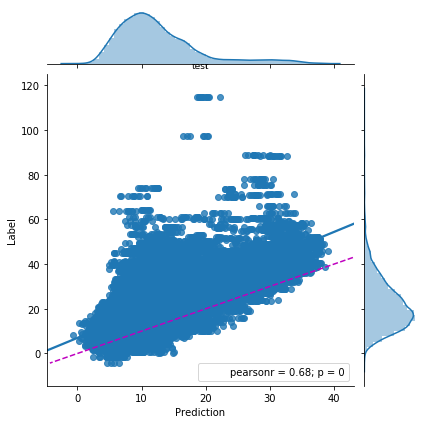

In [66]:
pred = model.predict(test_X_PM10)
model_performance_sc_plot(pred, test_Y_PM10, 'test')

In [36]:
test_Y_PM10

array([32.6, 36.8, 52.9, ..., 22.1, 19.9, 27.4])

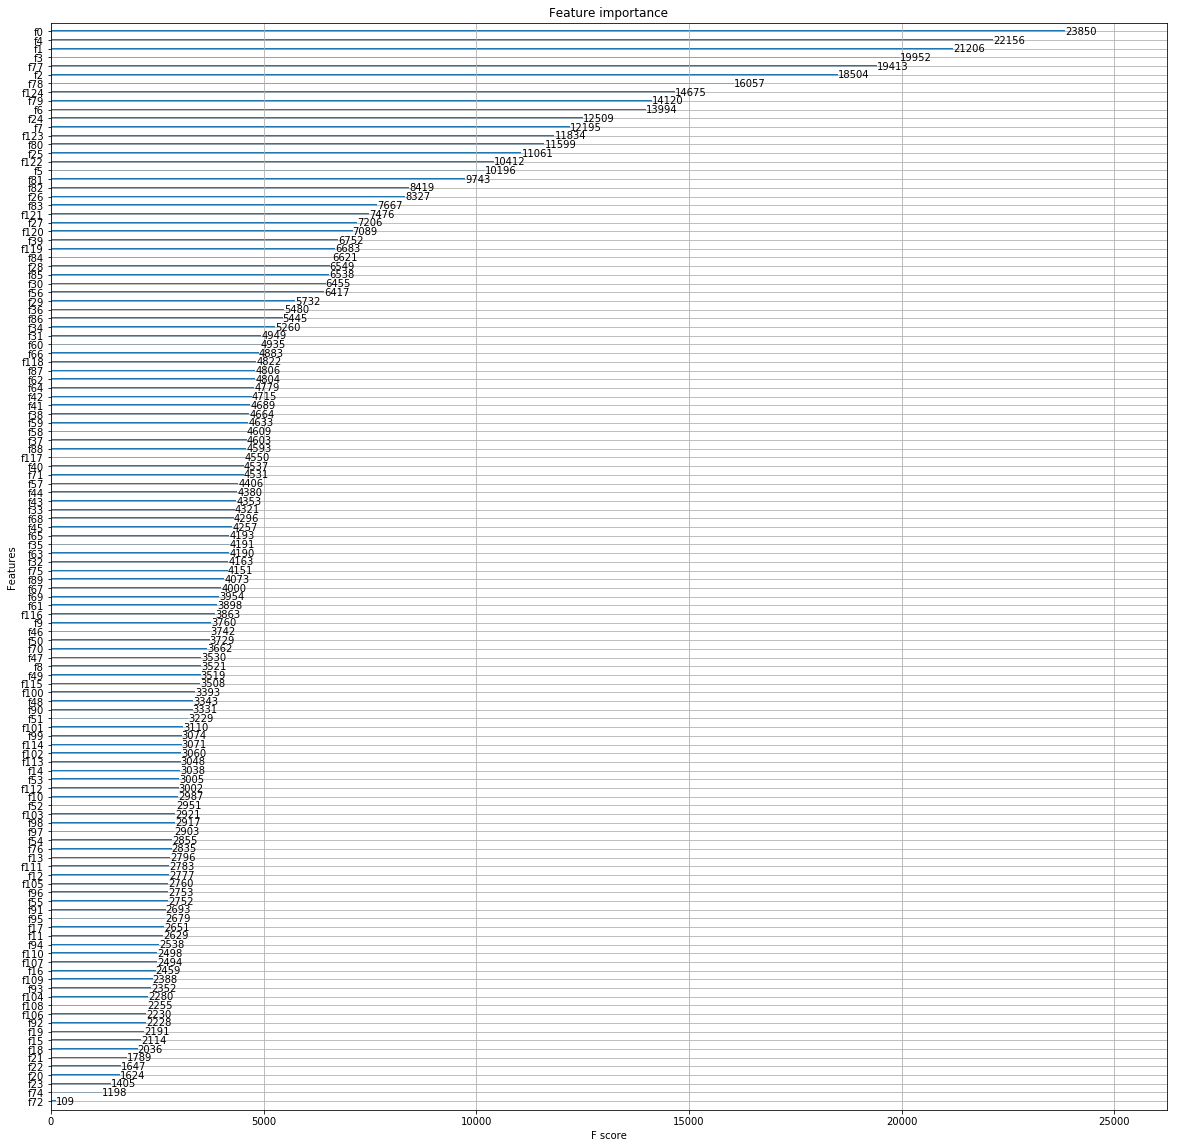

In [28]:
plot_features(model, (20,20))

# grid search for pm25

In [5]:
#grid search 
params = {
    # 'objective': reg:linear,
    'max_depth': 5,
    # 'learning_rate':0.001,
    'learning_rate': 0.001,
    'n_estimators': 2000,
    'gamma': 0.0,
    'min_child_weight': 2,
    'max_delta_step': 0,
    'subsample': 0.9,
    'colsample_bytree': 0.6,
    'colsample_bylevel': 0.9,
    'base_score': 10,
    'seed': 1
}

'''
'max_depth': 10,
'learning_rate': 0.001,
# 'learning_rate': 0.02,
'n_estimators': 3000,
'gamma': 0.8,
'min_child_weight': 2,
'reg_alpha': 0.001,
'max_delta_step': 0,
'subsample': 0.8,
'colsample_bytree': 0.8,
'colsample_bylevel': 0.9,
'base_score': 10,
'seed': 1,
'nthread': 10
'''

param_test1 = {
    'max_depth': range(7, 12, 2),
    'min_child_weight': [2],
    'gamma': [i / 10.0 for i in range(8, 9)],
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)],
    'reg_alpha': [0, 0.001, 0.001],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [1000, 2000, 3000]
}

param_test3 = {
    'gamma': [i / 10.0 for i in range(0, 10)]
}

param_test4 = {
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]
}

param_test6 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

param_test7 = {
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
}

param_test8 = {
    'learning_rate': [0.001, 0.002, 0.005, 0.01, 0.1],
    'n_estimators': [2000, 3000, 4000],
}

In [14]:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=2)
estimator=xgb.XGBRegressor(
    learning_rate=0.001,
    n_estimators=3000,
    max_depth=10,
    min_child_weight=2,
    reg_alpha=0.001,
    gamma=0.6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    seed=27)
gsearch1 = GridSearchCV(estimator, param_grid=param_test8, scoring=scoring, n_jobs=-1, cv=cv, verbose=6)
print (1)



1


In [15]:
gsearch1.fit(train_X_PM25, train_Y_PM25)
print (gsearch1.grid_scores_, gsearch1.best_score_)
print (gsearch1.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.35369033968439795, total=156.8min
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.3523677177737484, total=158.0min
[CV] learning_rate=0.001, n_estimators=3000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.3523016191614091, total=158.0min
[CV] learning_rate=0.001, n_estimators=3000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.3488942414858317, total=158.0min
[CV] learning_rate=0.001, n_estimators=3000 ..........................
[CV]  learning_rate=0.

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 317.6min


[CV]  learning_rate=0.001, n_estimators=3000, score=0.3308570863782389, total=232.1min
[CV] learning_rate=0.001, n_estimators=3000 ..........................
[CV]  learning_rate=0.001, n_estimators=3000, score=0.32672268874636323, total=234.2min
[CV] learning_rate=0.001, n_estimators=4000 ..........................
[CV]  learning_rate=0.001, n_estimators=3000, score=0.33234995780260973, total=234.6min
[CV] learning_rate=0.001, n_estimators=4000 ..........................
[CV]  learning_rate=0.001, n_estimators=3000, score=0.3302751440564483, total=233.7min
[CV] learning_rate=0.001, n_estimators=4000 ..........................


KeyboardInterrupt: 

In [ ]:
    '''   
    best_params1 = {
            'max_depth': 10,
            'learning_rate': 0.001,
            'n_estimators': 3000,
            'gamma': 0.8,
            'min_child_weight': 2,
            'reg_alpha': 0.001,
            'max_delta_step': 0,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'colsample_bylevel': 0.9,
            'base_score': 10,
            'seed': 1,
            'nthread': 30
        }
    '''